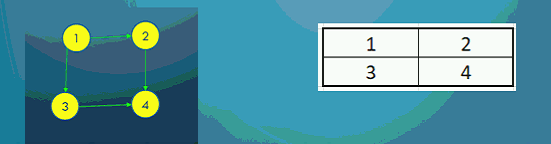

In [ ]:
#Path finding agent
#Depth first search agent
class Environment(object):
    mygraph = {"1":set(["2","3"]),
               "2":set(["1","4"]),
               "3":set(["1","4"]),
               "4":set(["2","3"]),
              }
    state = "2"
    goal = "4"
    
class Agent(Environment):
    
    def dfs(self, graph, start, goal):     #depth first search
        stack = [(start,[start])]
        P = []
        while stack:
            (vertex, path) = stack.pop()
            #print("Vertex and Path", vertex,path)
            #print("Stack 1: ", stack)
            for next in graph[vertex] - set(path):
                if next == goal:
                    P.append(path + [next])
                else:
                    stack.append((next, path + [next]))
                    #print("Stack 2: ", stack)
                
        return P
    
    def bfs(self, graph, start, goal):      #breadth first search
        stack = [(start,[start])]
        P = []
        while stack:
            (vertex, path) = stack.pop(0)
            #print("Vertex and Path", vertex,path)
            #print("Stack 1: ", stack)
            for next in graph[vertex] - set(path):
                if next == goal:
                    P.append(path + [next])
                    return P
                else:
                    stack.append((next, path + [next]))
                    #print("Stack 2: ", stack)
                
        return P
    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.mygraph, Environment.state, Environment.goal))
        print("Breadth First Search: ", self.bfs(Environment.mygraph, Environment.state, Environment.goal))
    
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)               
     

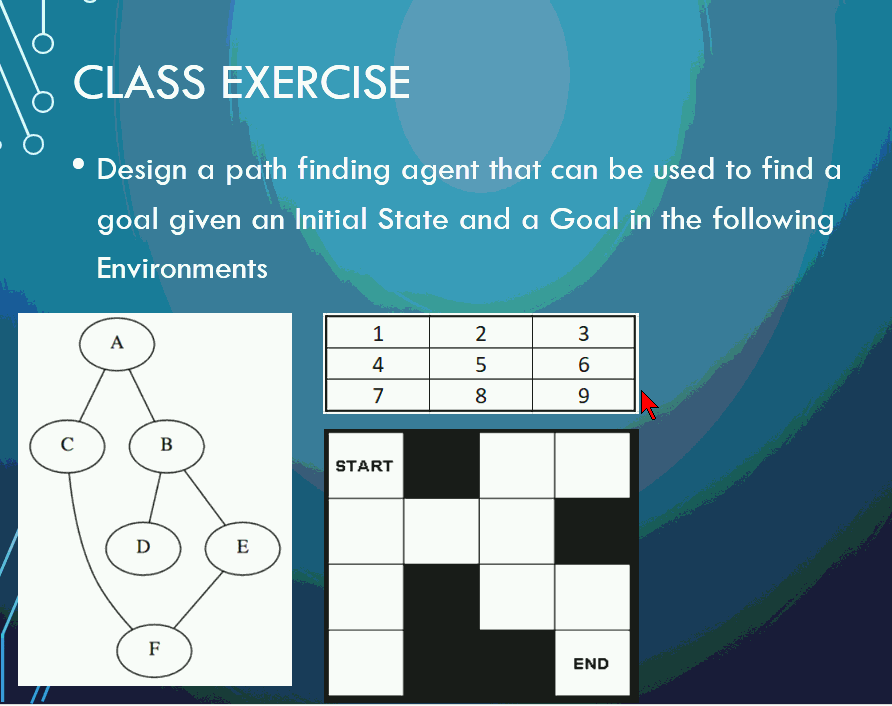

In [3]:
#Path finding agent
#Depth first search agent - shortest path
#Breath  - All possible paths
class Environment(object):
    mygraph = {"1":set(["2","4"]),
               "2":set(["1","3","5"]),
               "3":set(["2","6"]),
               "4":set(["1","5","7"]),
               "5":set(["2","4", "6","8"]),
               "6":set(["3","5","9"]),
               "7":set(["4","8"]),
               "8":set(["5","7","9"]),
               "9":set(["6","8"]),
              }
    
    cost = {str(["1","2"]):"3",str(["1","4"]):"5",
            str(["2","1"]):"3",str(["2","3"]):"5",str(["2","5"]):"7",
            str(["3","1"]):"4",str(["3","6"]):"9",
            str(["4","1"]):"5",str(["4","5"]):"9",str(["4","7"]):"11",
            str(["5","2"]):"7",str(["5","4"]):"9",str(["5","6"]):"11",str(["5","8"]):"13",
            str(["6","3"]):"9",str(["6","5"]):"11",str(["6","9"]):"15",
            str(["7","4"]):"11",str(["7","8"]):"15",
            str(["8","5"]):"13",str(["8","7"]):"15",str(["8","9"]):"17",
            str(["9","6"]):"15",str(["9","8"]):"17",
          }
            
        
    state = "1"
    goal = "9"
    
class Agent(Environment):
    
    def dfs(self, graph, start, goal):     #depth first search (all the routes)
        stack = [(start,[start])]
        P = []
        while stack:
            (vertex, path) = stack.pop()
            #print("Vertex and Path", vertex,path)
            #print("Stack 1: ", stack)
            for next in graph[vertex] - set(path):
                if next == goal:
                    P.append(path + [next])
                else:
                    stack.append((next, path + [next]))
                    #print("Stack 2: ", stack)
                
        return P
    
    def bfs(self, graph, start, goal):      #breadth first search
        stack = [(start,[start])]
        P = []
        while stack:
            (vertex, path) = stack.pop(0)
            #print("Vertex and Path", vertex,path)
            #print("Stack 1: ", stack)
            for next in graph[vertex] - set(path):
                if next == goal:
                    P.append(path + [next])
                    return P
                else:
                    stack.append((next, path + [next]))
                    #print("Stack 2: ", stack)
                
        return P
    
    def getcost(path_to_cost):
        i = 0
        path_cost = 0
        
        while i < len(path_to_cost) - 1:
            l = []
            l.append(path_to_cost[i])
            l.append(path_to_cost[i+ 1])
            path_cost = path_cost + int(Environment.cost[str(l)])
            
            i = i + 1
            
        return path_cost
    
    def ucs(self, graph, start, goal):
        stack = [(start,[start])]
        P = []
        c = []
        leastcost = 1000
        
        while stack:
            (vertex, path) = stack.pop()
            #print("Vertex and Path", vertex,path)
            #print("Stack 1: ", stack)
            for next in graph[vertex] - set(path):
                if next == goal:
                    path_cost = Agent.getcost(path+[next])
                    print("Path", path + [next], "Path cost", path_cost)
                    if path_cost < leastcost:
                        leastcost = path_cost
                        P = path +[next]
   
                else:
                    stack.append((next, path + [next]))
                    #print("Stack 2: ", stack)
                
        return P
        
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.mygraph, Environment.state, Environment.goal))
        print("Breadth First Search: ", self.bfs(Environment.mygraph, Environment.state, Environment.goal))
        print("Uniform Cost Search: ", self.ucs(Environment.mygraph, Environment.state, Environment.goal))
    
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)
        

Depth First Search:  [['1', '2', '5', '8', '9'], ['1', '2', '5', '4', '7', '8', '9'], ['1', '2', '5', '6', '9'], ['1', '2', '3', '6', '9'], ['1', '2', '3', '6', '5', '8', '9'], ['1', '2', '3', '6', '5', '4', '7', '8', '9'], ['1', '4', '5', '8', '9'], ['1', '4', '5', '2', '3', '6', '9'], ['1', '4', '5', '6', '9'], ['1', '4', '7', '8', '9'], ['1', '4', '7', '8', '5', '2', '3', '6', '9'], ['1', '4', '7', '8', '5', '6', '9']]
Breadth First Search:  [['1', '4', '7', '8', '9']]
Path ['1', '2', '5', '8', '9'] Path cost 40
Path ['1', '2', '5', '4', '7', '8', '9'] Path cost 62
Path ['1', '2', '5', '6', '9'] Path cost 36
Path ['1', '2', '3', '6', '9'] Path cost 32
Path ['1', '2', '3', '6', '5', '8', '9'] Path cost 58
Path ['1', '2', '3', '6', '5', '4', '7', '8', '9'] Path cost 80
Path ['1', '4', '5', '8', '9'] Path cost 44
Path ['1', '4', '5', '2', '3', '6', '9'] Path cost 50
Path ['1', '4', '5', '6', '9'] Path cost 40
Path ['1', '4', '7', '8', '9'] Path cost 48
Path ['1', '4', '7', '8', '5', '2

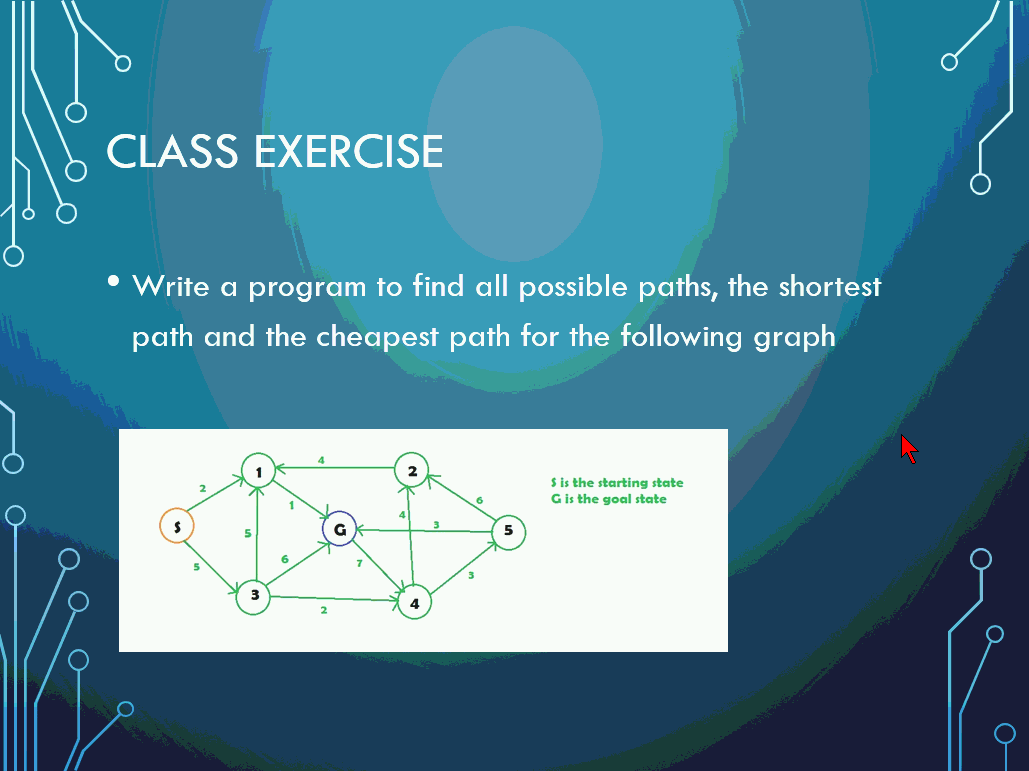


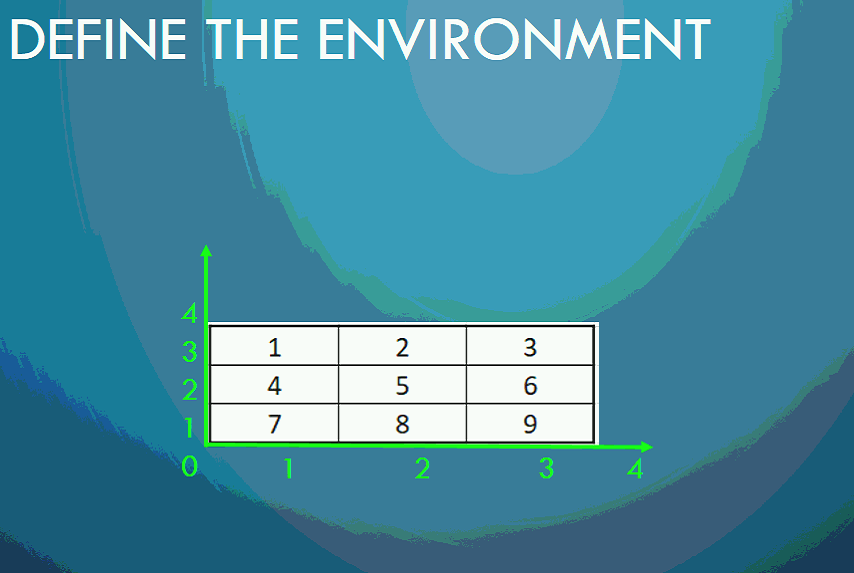